Intensity Weighting
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.add_dataset('lc', times=np.linspace(0,1,101))

<ParameterSet: 15 parameters | contexts: compute, dataset>

Relevant Parameters 
-------------------------------

In [4]:
b['intens_weighting']

<Parameter: intens_weighting=energy | keys: description, choices, value, visible_if, copy_for>

In [5]:
print b['intens_weighting']

Parameter: intens_weighting@lc01@dataset
                       Qualifier: intens_weighting
                     Description: Whether passband intensities are weighted by energy of photons
                           Value: energy
                         Choices: energy, photon



Influence on Light Curves (fluxes)
---------------------------------------------

Let's (roughtly) reproduce Figure 5 from [Prsa et al. 2016](http://phoebe-project.org/publications/2016Prsa+) which shows the difference between photon and energy intensity weighting.

<img src="prsa+2016_fig5.png" alt="Figure 8" width="600px"/>

In [6]:
for teff_primary in [5000,7500,10000,12500,15000]:
    b['teff@primary'] = teff_primary
    b['teff@secondary'] = 0.9 * teff_primary
    
    for weighting in ['energy', 'photon']:
        b['intens_weighting'] = weighting
        b.run_compute(irrad_method='none', model='{}_{}'.format(teff_primary, weighting))

Fri, 05 Oct 2018 14:18 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:18 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:18 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:18 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32.
Fri

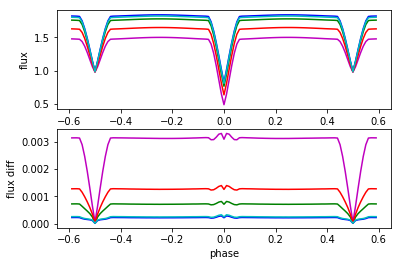

In [7]:
teff_colormap = {5000: 'm', 7500: 'r', 10000: 'g', 12500: 'c', 15000: 'b'}

fig = plt.figure()
ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)

for teff, color in teff_colormap.items():
    fluxes_energy = b.get_value('fluxes@{}_energy'.format(teff))
    fluxes_photon = b.get_value('fluxes@{}_photon'.format(teff))
    phases = b.to_phase('times@lc@dataset')
    
    # alias data from -0.6 to 0.6
    fluxes_energy = np.append(fluxes_energy, fluxes_energy[abs(phases) > 0.4])
    fluxes_photon = np.append(fluxes_photon, fluxes_photon[abs(phases) > 0.4])
    phases = np.append(phases, phases[abs(phases)>0.4]+1.0)
    phases[phases > 1.0] = phases[phases > 1.0] - 2.0
    
    sort = phases.argsort()
    phases = phases[sort]
    fluxes_energy = fluxes_energy[sort]
    fluxes_photon = fluxes_photon[sort]
    
    ax1.plot(phases, fluxes_energy, color=color)
    ax2.plot(phases, fluxes_photon-fluxes_energy, color=color)

lbl = ax1.set_xlabel('')
lbl = ax1.set_ylabel('flux')
lbl = ax2.set_xlabel('phase')
lbl = ax2.set_ylabel('flux diff')